##Practica 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.integrate import quad

In [2]:
plt.rcParams.update(
    {
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.alpha": 0.7,
        "axes.facecolor": "whitesmoke",
        "axes.labelsize": 12,
        "axes.labelweight": "bold",
        "axes.labelcolor": "navy",
        "axes.titlesize": 14,
        "axes.titleweight": "bold",
        "axes.titlecolor": "navy",
        "xtick.color": "black",
        "ytick.color": "black",
        "legend.fontsize": 10,
        "legend.frameon": False,
        "figure.autolayout": True,
    }
)

### Problema 1 ¿en que negocio conviene comprar?


In [3]:
# Variables
n1, k1 = 10, 10
n2, k2 = 50, 48
n3, k3 = 200, 186

In [4]:
# Pp  prior uniforme en (0,1) sobre los p_i
def Pp(p):
    return 1


# Pk_np
# k_i, el numero de "me gustas" que recibe el negocio i. k_i <= n_i
def Pk_np(k, n, p):
    return st.binom.pmf(k, n, p)

#### 1.1 Interpretacion de Galton Board


- Cada obstaculo representa una decision binomial, gusta o no gusta.
- Cada recipiente representa el numero total de "me gusta" posible
- La cantidad de niveles representa el numero de personas $n_i$ que toman la decision


#### 1.2 Plotear posterior de $p_i$


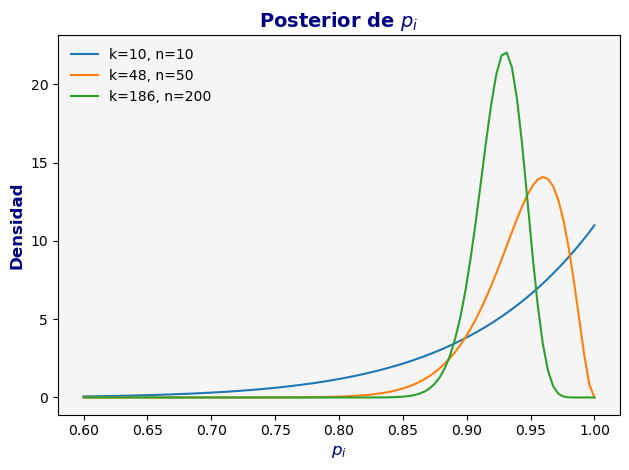

In [5]:
# Posterior de p_i
def Pp_kn(p, k, n):
    return st.beta.pdf(p, k + 1, n - k + 1)


plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k1, n1),
    label=f"k={k1}, n={n1}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k2, n2),
    label=f"k={k2}, n={n2}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k3, n3),
    label=f"k={k3}, n={n3}",
)

plt.title("Posterior de $p_i$")
plt.xlabel("$p_i$")
plt.ylabel("Densidad")

plt.legend()
plt.tight_layout()

#### 1.3 Intervalos de credibilidad de $p_i$


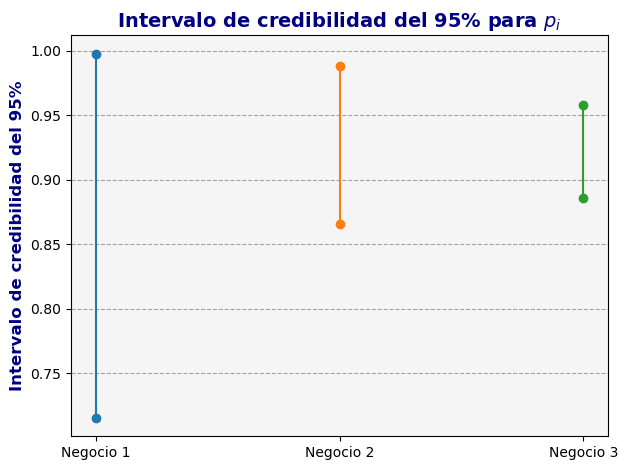

In [6]:
# intervalos de credibilidad del 95%

intervalos = [
    st.beta.interval(0.95, k1 + 1, n1 - k1 + 1),
    st.beta.interval(0.95, k2 + 1, n2 - k2 + 1),
    st.beta.interval(0.95, k3 + 1, n3 - k3 + 1),
]

labels = ["Negocio 1", "Negocio 2", "Negocio 3"]
x = np.arange(len(labels))

plt.figure()
for i, (low, high) in enumerate(intervalos):
    plt.plot([i, i], [low, high], marker="o")

plt.xticks(x, labels)
plt.ylabel("Intervalo de credibilidad del 95%")
plt.title("Intervalo de credibilidad del 95% para $p_i$")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### 1.4 Elegir donde comprar.


- ¿que forma tiene la expresion final? la del valor esperado para P dados los datos


In [7]:
from scipy.integrate import quad

# Calcular la distribucion de probabilidad marginal de nuestra experiencia dado los datos,
# integrando todos los valores de p.

prob_marginal_m = []
for k, n in [(k1, n1), (k2, n2), (k3, n3)]:
    integral, _ = quad(lambda p: p * Pp_kn(p, k, n), 0, 1)
    prob_marginal_m.append(integral)

for i, p in enumerate(prob_marginal_m):
    print(f"Probabilidad marginal de m=1 para el negocio {i+1}: {p:.3f}")

Probabilidad marginal de m=1 para el negocio 1: 0.917
Probabilidad marginal de m=1 para el negocio 2: 0.942
Probabilidad marginal de m=1 para el negocio 3: 0.926


### Problema 2 - Arqueras Mexicanas


Variables:

- $x$ = posicion del arco
- $y_i$ = posicion de la flecha
- $\beta$ = desvio standard de la posicion de la flecha
- $\sigma$ = desvio standard de la posicion del arco
- $\mu$ = posicion promedio del arco

Posicion de la flecha: $$P(y_i|x) = N(y_i|x,\beta^2)$$

Prior sobre la posicion del arco: $$P(x) = N(x|\mu,\sigma^2)$$


#### 2.1 Prediccion sobre la posicion de la primera flecha


##### Aproximacion numerica


In [8]:
# Prior sobre x
def Px(x):
    mu = 0
    sigma = 1.5
    return st.norm.pdf(x, mu, sigma)


# supongo que beta = 1
def Py_x(y, x):
    return st.norm.pdf(y, x, 1)


def aproximacion_Py(range):
    matrix = np.zeros((len(range), len(range)))

    for i, x in enumerate(range):
        for j, y in enumerate(range):
            matrix[i, j] = Py_x(y, x) * Px(x)

    return matrix

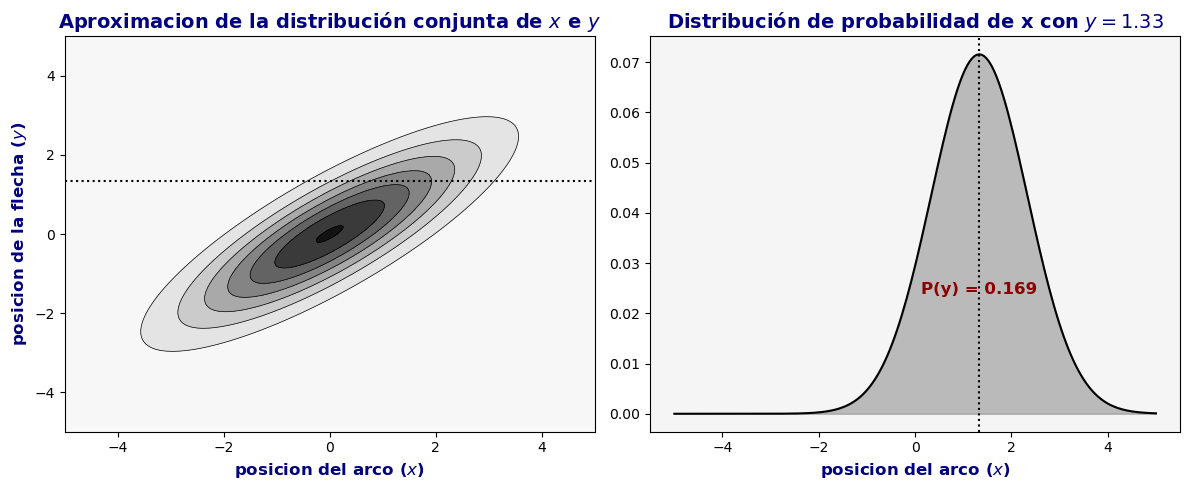

In [9]:
range = np.linspace(-5, 5, 200)
Z = aproximacion_Py(range)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

### Distribucion conjunta aproximada

contour_filled = ax[0].contourf(range, range, Z, levels=7, cmap="Greys")
contour_lines = ax[0].contour(range, range, Z, levels=7, colors="black", linewidths=0.5)

ax[0].set_xlabel(
    "posicion del arco ($x$)", fontsize=12, fontweight="bold", color="navy"
)
ax[0].set_ylabel(
    "posicion de la flecha ($y$)", fontsize=12, fontweight="bold", color="navy"
)
ax[0].set_title(
    "Aproximacion de la distribución conjunta de $x$ e $y$",
    fontsize=14,
    fontweight="bold",
    color="navy",
)

# Integro sobre x para la posicion de y = y_val
y_val = 1.33
index_y_val = np.abs(range - y_val).argmin()

ax[0].axhline(y=y_val, color="black", linestyle="dotted")


### Distribucion de probabilidad a priori de Y.

Z_at_y_val = Z[index_y_val, :]

ax[1].plot(range, Z_at_y_val, color="black")
ax[1].fill_between(range, Z_at_y_val, color="grey", alpha=0.5)

ax[1].set_xlabel(
    "posicion del arco ($x$)", fontsize=12, fontweight="bold", color="navy"
)

ax[1].set_title(
    f"Distribución de probabilidad de x con $y={y_val}$",
    fontsize=14,
    fontweight="bold",
    color="navy",
)

# integrar area bajo al curva
integral, _ = quad(lambda x: Py_x(y_val, x) * Px(x), -5, 5)


ax[1].text(
    y_val,
    max(Z_at_y_val) / 3,
    f"P(y) = {integral:.3f}",
    fontsize=12,
    fontweight="bold",
    color="darkred",
    ha="center",
)

ax[1].axvline(x=y_val, color="black", linestyle="dotted")


ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor("whitesmoke")
ax[1].set_facecolor("whitesmoke")
plt.tight_layout()

##### Solucion exacta


In [10]:
def Py(y):
    mu = 0
    sigma = 1.5
    beta = 1

    return st.norm.pdf(y, mu, np.sqrt(sigma**2 + beta**2))


print(f"Py(Y={y_val}) aproximada = {integral:.3f}")
print(f"Py(Y={y_val}) exacta = {Py(y_val):.3f}")

Py(Y=1.33) aproximada = 0.169
Py(Y=1.33) exacta = 0.169


#### 2.2 Posterior sobre la posicion del arco


Text(0.5, 1.0, 'Simulacion de los datos')

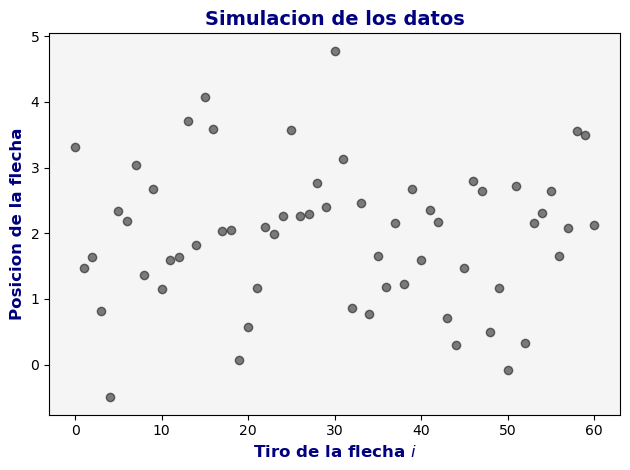

In [33]:
### Simulacion de los datos

# parametros para x: mu=2, sigma=0.6
# parametros para y: asumo que beta = 1

np.random.seed(222)

posiciones_arco = st.norm.rvs(loc=2, scale=0.6, size=61)
posiciones_flecha = st.norm(loc=posiciones_arco, scale=1).rvs()


plt.plot(posiciones_flecha, "o", color="black", alpha=0.5)
plt.xlabel("Tiro de la flecha $i$")
plt.ylabel("Posicion de la flecha")
plt.title("Simulacion de los datos")

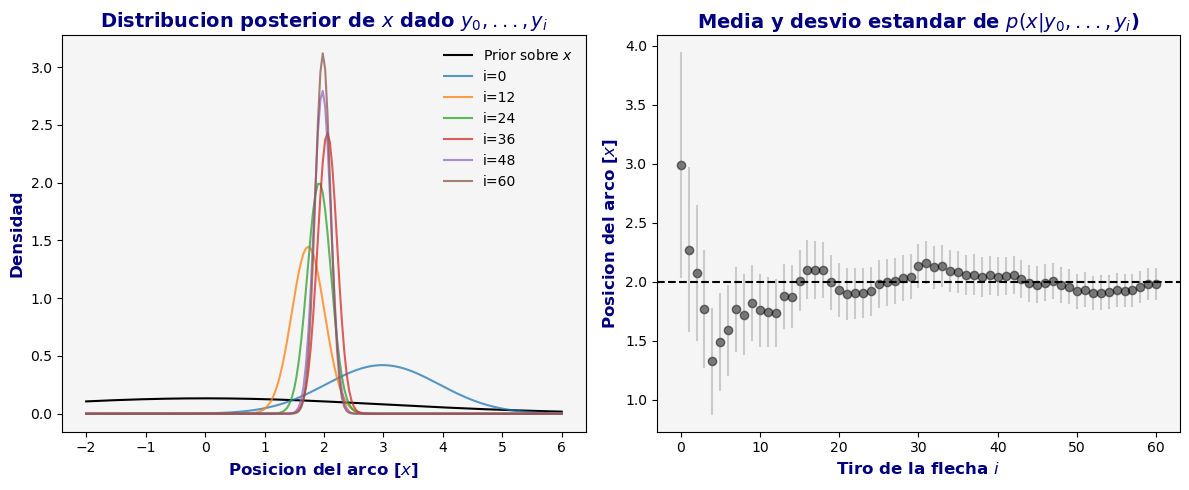

In [38]:
# Los parametros por default para mu y sigma definen el prior sobre x.
# Elijo  mu=0 y sigma=3 como priors, poco informativo con media en 0.
# reales de la distribucion de x con la que se generaron los datos.


def Px_y(y, mu=0, sigma=3, beta=1):
    # regresa los parametros de la normal posterior para x dado y.
    mu_posterior = (y * (sigma**2) + mu * (beta**2)) / (sigma**2 + beta**2)

    sigma_posterior = np.sqrt((sigma**2) * (beta**2) / (sigma**2 + beta**2))

    return mu_posterior, sigma_posterior


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
x_range = np.linspace(-2, 6, 200)

# ploteo prior sobre x
axs[0].plot(
    x_range,
    st.norm.pdf(x_range, loc=0, scale=3),
    label="Prior sobre $x$",
    color="black",
)

for i, yi in enumerate(posiciones_flecha):

    # Para el primer dato uso los valores a priori de mu y sigma.
    if i == 0:
        mu_posterior, sigma_posterior = Px_y(yi)
    else:
        mu_posterior, sigma_posterior = Px_y(yi, mu_posterior, sigma_posterior)

    # Plotear la distribucion posterior dado y_i
    if i % 12 == 0:
        axs[0].plot(
            x_range,
            st.norm.pdf(x_range, mu_posterior, sigma_posterior),
            label=f"i={i}",
            alpha=0.75,
        )

    # Plotear la media de la distribucion y un desvio standard
    axs[1].plot(i, mu_posterior, "o", color="black", alpha=0.5)
    axs[1].plot(
        [i, i],
        [mu_posterior - sigma_posterior, mu_posterior + sigma_posterior],
        color="dimgray",
        alpha=0.3,
    )

# linea horizonal sobre la verdadera media de los datos
axs[1].axhline(y=2, color="black", linestyle="--")

axs[0].legend()
axs[0].set_xlabel("Posicion del arco [$x$]")
axs[0].set_ylabel("Densidad")
axs[0].set_title("Distribucion posterior de $x$ dado ${y_0, ..., y_i}$")

axs[1].set_ylabel("Posicion del arco [$x$]")
axs[1].set_xlabel("Tiro de la flecha $i$")
axs[1].set_title("Media y desvio estandar de $p(x|{y_0, ..., y_i}$)")

plt.tight_layout()

#### 2.3 Prediccion sobre la posicion de la proxima flecha


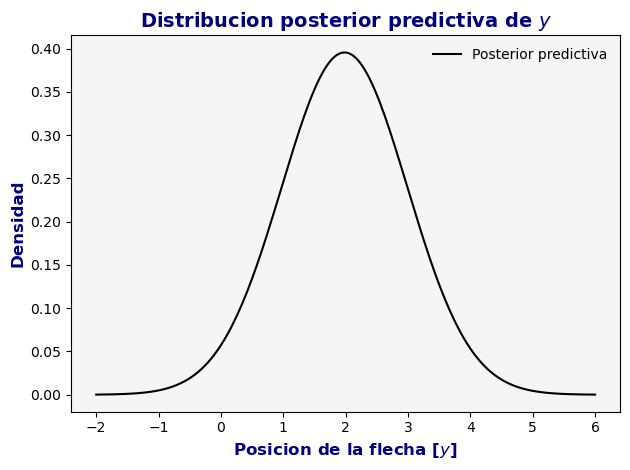

In [ ]:
# Distribucion posterior predictiva sobre yi+1


def posterior_x(x):
    return st.norm.pdf(x, mu_posterior, sigma_posterior)


def posterior_predictiva_y(y):
    x_range = np.linspace(-6, 6, 100)
    integral, _ = quad(lambda x: Py_x(y, x) * posterior_x(x), -6, 6)
    return integral


plt.plot(
    x_range,
    [posterior_predictiva_y(y) for y in x_range],
    label="Posterior predictiva",
    color="black",
)

plt.xlabel("Posicion de la flecha [$y$]")
plt.ylabel("Densidad")
plt.title("Distribucion posterior predictiva de $y$")
plt.legend()
plt.tight_layout()